In [23]:
import pandas as pd

In [24]:
df=pd.read_excel('Online retail.xlsx')

In [25]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [26]:
df.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [27]:
df.shape

(7500, 1)

In [28]:
df.duplicated().sum()

2325

In [29]:
df.columns

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')

In [30]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Convert each transaction into a list of items
transactions = df.iloc[:,0].apply(lambda x: x.split(','))

In [31]:
# Step 2: Create a one-hot encoded dataframe
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_array, columns=te.columns_)

In [32]:
# Step 3: Generate frequent itemsets using Apriori
frequent_itemsets = apriori(df_trans, min_support=0.02, use_colnames=True)

In [33]:
# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [34]:
# Step 5: Sort and view top rules
rules.sort_values(by="support", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
82,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,1.0,0.018243,1.159468,0.369806,0.169376,0.137536,0.296866
83,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,1.0,0.018243,1.102184,0.400941,0.169376,0.092710,0.296866
25,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,1.0,0.013623,1.073398,0.339566,0.150706,0.068379,0.271220
24,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,1.0,0.013623,1.122506,0.309351,0.150706,0.109136,0.271220
41,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,1.0,0.008109,1.043286,0.209004,0.138758,0.041490,0.248574
40,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,1.0,0.008109,1.062957,0.194090,0.138758,0.059228,0.248574
71,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,1.0,0.017121,1.209812,0.409789,0.150063,0.173425,0.285913
70,(mineral water),(milk),0.238267,0.129600,0.048000,0.201455,1.554436,1.0,0.017121,1.089982,0.468248,0.150063,0.082554,0.285913
64,(mineral water),(ground beef),0.238267,0.098267,0.040933,0.171796,1.748266,1.0,0.017520,1.088782,0.561883,0.138475,0.081543,0.294175
65,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,1.0,0.017520,1.305576,0.474647,0.138475,0.234054,0.294175


In [35]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

In [36]:
rules = rules[rules['lift'] >= 1.2]

# Sort rules by lift
rules = rules.sort_values(by="lift", ascending=False)

# Display top 10 rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,1.0,0.022088,1.373959,0.624888,0.168096,0.272176,0.312015
18,(olive oil),(spaghetti),0.065733,0.174133,0.022933,0.348884,2.003547,1.0,0.011487,1.268387,0.536127,0.105716,0.211597,0.240292
14,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
19,(tomatoes),(spaghetti),0.068400,0.174133,0.020933,0.306043,1.757520,1.0,0.009023,1.190083,0.462663,0.094465,0.159723,0.213129
11,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,1.0,0.011805,1.308483,0.460018,0.099325,0.235756,0.266563
7,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,1.0,0.017520,1.305576,0.474647,0.138475,0.234054,0.294175
4,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,1.0,0.007966,1.257517,0.416947,0.074789,0.204782,0.239378
2,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
6,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,1.0,0.013019,1.218433,0.402718,0.119964,0.179273,0.262399


# Association Rule Mining – Analysis & Interpretation

**Frequent Itemsets**

The top items purchased frequently include mineral water, eggs, spaghetti, french fries, chocolate, milk, and green tea.

Mineral water stands out with the highest support (~24%), showing it is the most common item in transactions.

These frequent items suggest a mix of staple groceries (milk, eggs, spaghetti) and snacking items (chocolate, french fries, pancakes), indicating both everyday use and impulse buying.

**Association Rules (Lift-based)**

Strong associations were found between:

Ground beef → Spaghetti (lift = 2.29): Customers buying ground beef are very likely to also buy spaghetti, pointing to pasta meal preparation.

Olive oil → Spaghetti (lift = 2.00): Suggests Mediterranean cooking habits.

Soup → Mineral water (lift = 1.91): Likely bundled for a complete meal.

Burgers → Eggs (lift = 1.83): Indicates combined meal preparation needs.

Tomatoes → Spaghetti (lift = 1.75): Reinforces Italian cuisine patterns.

Lift > 1 confirms these are meaningful associations beyond chance, showing meal-based buying behaviour.**

**Confidence-based Rules**

Some of the strongest confidence values:

Soup → Mineral water (45.6%)

Ground beef → Mineral water (41.6%)

Olive oil → Mineral water (41.7%)

Frozen vegetables → Mineral water (37.5%)

This highlights that mineral water is frequently bought with many food categories, suggesting it is a staple that complements most grocery trips.

# Visualization

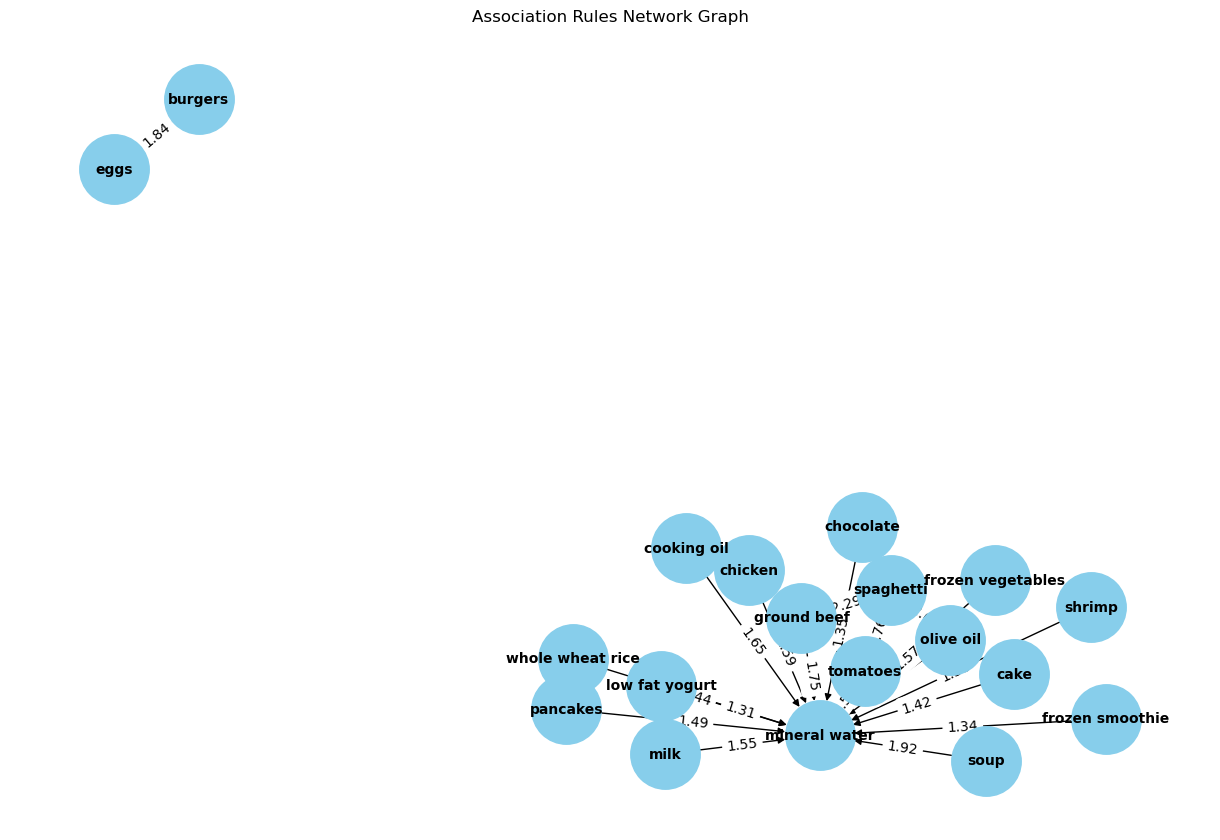

In [39]:
import networkx as nx

# Take top 20 rules
top_rules = rules.head(20)

G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels={k:round(v,2) for k,v in labels.items()})
plt.title("Association Rules Network Graph")
plt.show()


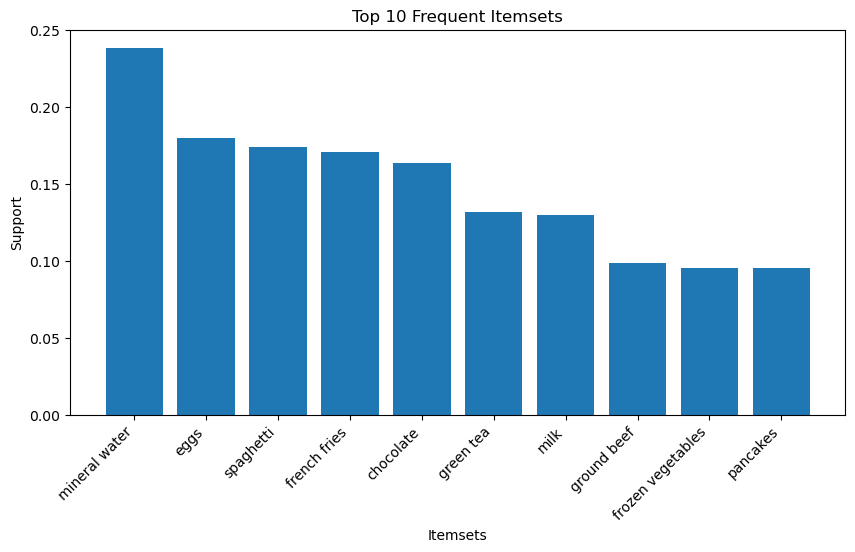

In [38]:
import matplotlib.pyplot as plt

# Plot top 10 frequent items
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
top_items = frequent_itemsets.sort_values(by="support", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_items['itemsets'], top_items['support'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("Top 10 Frequent Itemsets")
plt.show()


Mineral water is the central hub in the association rules network, strongly connected with eggs, milk, frozen vegetables, olive oil, and ground beef.

This indicates that mineral water acts as a cross-product anchor, often purchased alongside both fresh and packaged items.

# Conclusion

The analysis shows strong meal-preparation patterns (Italian and breakfast-related), with mineral water being a universal product that connects with multiple categories. Leveraging these insights can improve store layout, promotions, and recommendation systems.

In [40]:
rules.to_csv('Best Associations.csv')

# Interview Questions

1.	What is lift and why is it important in Association rules?

Lift is a metric used to evaluate the strength of an association rule in market basket analysis. It measures how much more likely two items are to occur together than if they were statistically independent.

Mathematically:

Lift
(
𝐴
⇒
𝐵
)
=
Support
(
𝐴
∪
𝐵
)
Support
(
𝐴
)
×
Support
(
𝐵
)

Lift(A⇒B)=
Support(A)×Support(B)
Support(A∪B)
	​

If Lift = 1 → A and B are independent (no relationship).

If Lift > 1 → A and B are positively correlated (purchased together more often than random chance).

If Lift < 1 → A and B are negatively correlated (purchased together less often than expected).

Importance:

Lift helps us identify meaningful and non-random associations.

A rule with high confidence but low lift may just reflect popular items, not a true relationship.

Therefore, lift is critical for filtering out spurious rules and focusing on product combinations that provide business value (e.g., cross-selling opportunities).

2.	What is support and Confidence. How do you calculate them?

**Support:**

* Support tells us **how frequently an itemset appears in the dataset**.
* It is the proportion of transactions that contain a particular item or itemset.

$$
\text{Support}(A) = \frac{\text{Number of transactions containing A}}{\text{Total number of transactions}}
$$

Example: If 200 out of 1,000 transactions include *Milk*, then

$$
\text{Support}(Milk) = \frac{200}{1000} = 0.2 \, (20\%)
$$

---

**Confidence:**

* Confidence measures the **reliability of an association rule**.
* It shows how often items in **B** appear in transactions that contain **A**.

$$
\text{Confidence}(A \Rightarrow B) = \frac{\text{Support}(A \cup B)}{\text{Support}(A)}
$$

Example: If 150 out of the 200 transactions that contain *Milk* also contain *Bread*, then

$$
\text{Confidence}(Milk \Rightarrow Bread) = \frac{150}{200} = 0.75 \, (75\%)
$$

---

✅ **Summary:**

* **Support** → How common an itemset is in the dataset.
* **Confidence** → How likely B is bought when A is bought.
* Both are used together with **Lift** to determine strong association rules.


3. What are some limitations or challenges of Association rules mining?

1. **Too Many Rules Generated (Combinatorial Explosion):**

   * Association rule mining can generate thousands of rules, many of which may not be useful.
   * Filtering meaningful rules requires careful selection of thresholds (support, confidence, lift).

2. **Choosing the Right Thresholds:**

   * If support is set too high → important but less frequent patterns may be missed.
   * If support is set too low → too many trivial or noisy rules may appear.

3. **Interpretability of Rules:**

   * Not all discovered rules are actionable or easy to interpret.
   * Some rules may simply reflect obvious correlations rather than meaningful business insights.

4. **Scalability with Large Datasets:**

   * For very large transaction datasets, algorithms like Apriori can be computationally expensive because they repeatedly scan the database.
   * Although FP-Growth improves efficiency, scalability remains a concern with big data.

5. **Ignores Temporal and Sequential Information:**

   * Traditional association rule mining does not consider the **order of purchases** (e.g., buying *shampoo before conditioner*).
   * It only looks at co-occurrence, not sequence or causality.

6. **Rare Item Problem:**

   * Rare but important item combinations (e.g., luxury products) may be ignored due to low support.

7. **Context Dependence:**

   * Some rules may not hold true across different stores, seasons, or customer groups.

---

✅ **Summary:**
Association rule mining is powerful for finding hidden patterns, but the key challenges include **too many rules, computational cost, difficulty in interpreting results, and ignoring time/sequence effects**.

